# Heart Disease Prediction

2025-02-09 20:41:20,279 - Dataset loaded successfully. Displaying basic information.


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


None

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


2025-02-09 20:41:20,322 - Checking for missing values in the dataset:
2025-02-09 20:41:20,323 - age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
2025-02-09 20:41:20,324 - Visualizing the feature correlation heatmap.


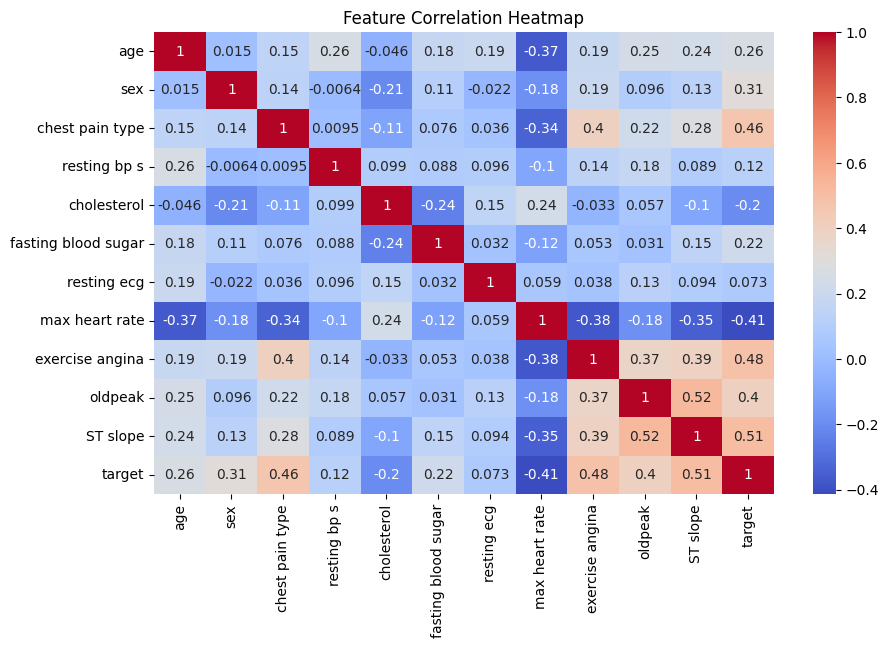

2025-02-09 20:41:20,619 - Standardizing the features.
2025-02-09 20:41:20,625 - Training Logistic Regression model.
2025-02-09 20:41:20,634 - Logistic Regression Accuracy: 0.8613
2025-02-09 20:41:20,640 -               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

2025-02-09 20:41:20,641 - Training Random Forest model.
2025-02-09 20:41:20,788 - Random Forest Accuracy: 0.9454
2025-02-09 20:41:20,793 -               precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

20

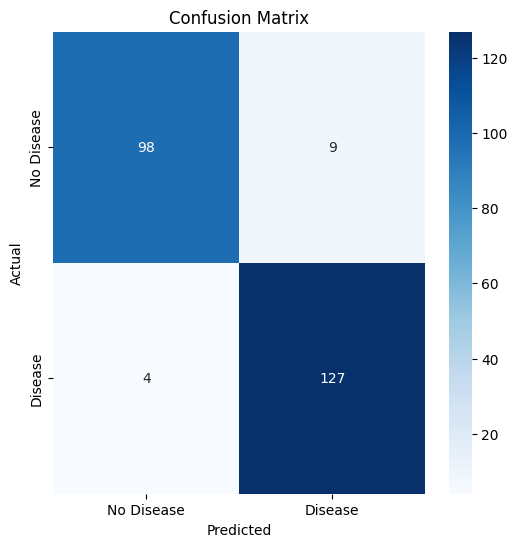

2025-02-09 20:41:21,094 - Displaying the first few actual vs predicted values:
2025-02-09 20:41:21,094 -      Actual  Predicted
390       1          1
247       1          1
260       0          0
155       1          1
984       1          1
2025-02-09 20:41:21,097 - Visualizing feature importance using SHAP.


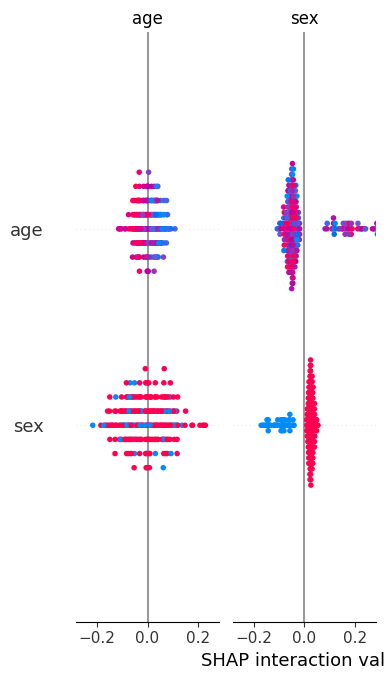

2025-02-09 20:41:26,145 - The best model has been saved as 'heart_disease_model.pkl'.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import joblib
import logging

# Setup logging for professional output
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(message)s")

# Load dataset
df = pd.read_csv("dataset.csv")

# Display basic info
logging.info("Dataset loaded successfully. Displaying basic information.")
display(df.head())
display(df.info())
display(df.describe())

# Check for missing values
logging.info("Checking for missing values in the dataset:")
logging.info(df.isnull().sum())

# Visualize data distribution
logging.info("Visualizing the feature correlation heatmap.")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

X = df.drop(columns=['target'])  # Features (input variables)
y = df['target']  # Label (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
logging.info("Standardizing the features.")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    logging.info(f"Training {name} model.")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logging.info(f"{name} Accuracy: {accuracy:.4f}")
    logging.info(classification_report(y_test, y_pred))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Predict and display confusion matrix
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
logging.info("Confusion Matrix computed:")
logging.info(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display actual vs predicted values 
df_actual_predicted = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
logging.info("Displaying the first few actual vs predicted values:")
logging.info(df_actual_predicted.head())

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with the original feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)  # Preserve original feature names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)    # Preserve original feature names

# Feature importance using SHAP
logging.info("Visualizing feature importance using SHAP.")
explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_test_scaled, check_additivity=False)

# SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns)  # Pass feature names here

# Save the best model
joblib.dump(best_model, "heart_disease_model.pkl")
logging.info("The best model has been saved as 'heart_disease_model.pkl'.")